# Inhaltsverzeichnis 

- **k-Means-Clustering (mit `sklearn`)**
    - **Daten erzeugen**
    - **Aufgabe 1: Modell trainieren**
    - **Aufgabe 2: Visualisierung**
    - **Aufgabe 3: Punkte vorhersagen**
    - **Aufgabe 4: Der optimale Wert für k**
    - **Aufgabe 5: Noise**


# k-Means-Clustering (mit `sklearn`)

In dieser Aufgabe wollen wir die Anwendung des **k-Means-Clustering** mit `sklearn` üben.

## Daten erzeugen

Wir wollen in dieser Aufgabe mit **synthetischen** Daten arbeiten. 

Die folgenden Zellen erzeugen 100 Datenpunkte mit jeweils zwei Features und speichert sie in der Variable `X`.
Hierfür benutzen wir die Funktion [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) aus `sklearn`. Diese Funktion kann synthetische Daten erzeugen. Wir geben dafür an, dass wir 2 Features (`n_features`) haben möchten und $3$ "Blobs".

In [9]:
# Ausführen, für den Fall, dass  Warnungen ignoriert werden sollen
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='whitegrid')    

<Axes: title={'center': 'Daten'}, xlabel='Features 1', ylabel='Features 2'>

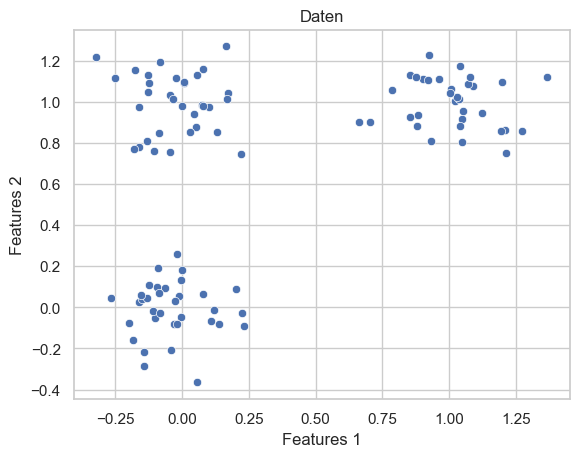

In [11]:
# Das Rauschen der Daten
noise = 0.13

# Die Anzahl der Datenpunkte
N = 100


# Erzeugt N Datenpunkte mit je 2 Features und 3 "Blobs" 
# Abhängig vom Rauschen sind die Daten mehr oder weniger um
# die "centers" gestreut.
X, y = make_blobs(n_samples = N,     
                  centers = [[0,0], [1,1], [0,1]],    
                  cluster_std = [noise, noise, noise], 
                  n_features = 2,
                  random_state = 33)

# Daten darstellen
plt.title("Daten"); plt.xlabel("Features 1"); plt.ylabel("Features 2")
sns.scatterplot(x=X[:, 0], y=X[:, 1])

Es sollten recht deutlich drei verschiedene Cluster erkennbar sein. 

Wir wollen nun versuchen ein Modell zu **trainieren**, welches in der Lage ist, diese Cluster _ohne_ die Labels `y` zu identifizieren $\Longrightarrow$ **_Unsupervised Learning_**

## Aufgabe 1: Modell trainieren

- Erstelle ein [k-Means-Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) Modell in der Variable `kmeans`. Wähle als $k=3$, d.h. beim Erstellen des Modells muss als Argument `n_clusters=3` angegeben werden.

- Trainiere das Modell auf den obigen Daten `X`. Verwende dazu die Funktion [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) von `kmeans`.

In [12]:
from sklearn.cluster import KMeans

# Schreibe deinen Code hier.

kmeans = KMeans(n_clusters=3,random_state=33)
kmeans.fit(X)

# Schreibe deinen Code hier.

KMeans(n_clusters=3, random_state=33)

## Aufgabe 2: Visualisierung

Nachdem unser Modell trainiert ist, wollen wir uns das Ergebnis darstellen lassen. 

- In dem Attribut `kmeans.labels_` befinden sich die Klassenlabels für die $N$ Datenpunkte. 
- Erstelle wie oben ein Scatterplot der Daten, nur diesmal sollen alle Datenpunkte eines Clusters die gleiche Farbe bekommen. Verwende dazu den Parameter `hue` der [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) Funktion.
- In dem Attribut `kmeans.cluster_centers_` befinden sich die Mittelpunkte der 3 Clusters. 
- Lasse dir diese Positionen als ein Kreuz im gleichen Schaubild anzeigen. 


In [13]:
kmeans.cluster_centers_

array([[ 1.0081805 ,  0.99670093],
       [-0.03730505, -0.00842705],
       [-0.02421124,  0.99481347]])

In [14]:
kmeans.labels_

array([0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0])

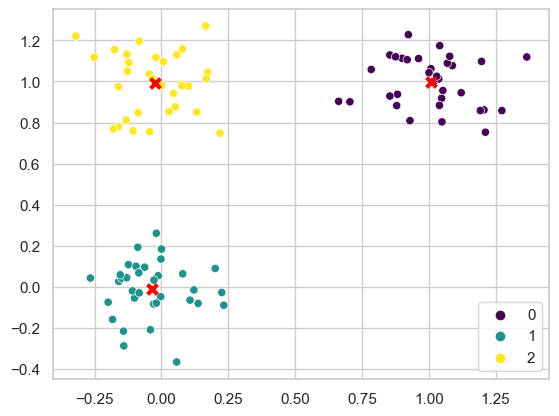

In [15]:
# Schreibe deinen Code hier.

sns.scatterplot(x=X[:, 0], y=X[:, 1],hue=kmeans.labels_,palette="viridis")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="x",c="red",s=50,linewidths=3)

# Schreibe deinen Code hier.

## Aufgabe 3: Punkte vorhersagen

- Wir wollen die Clusterzugehörigkeit folgender Punkte vorhersagen: 

\begin{array}{c|c} 
x & y \\ \hline  \hline 
0 & 0 \\ \hline
0 & 0.5 \\ \hline 
0 & 1.5 \\ \hline 
1 & 0 \\ \hline
\end{array}

- Überlege dir vorab (durch Betrachten des Scatterplots) zu welchem Cluster _du_ die einzelnen Punkte zählen würdest.

- Verwende die Funktion [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) des Modells `kmeans` um die Vorhersage des Modells für die Punkte zu betrachten. 

- Stimmen die Ergebnisse mit deiner Wahl überein? 


In [16]:
X_test = np.array([[0,0], [0, 0.5], [0, 1.5], [1,0]])

# Schreibe deinen Code hier.

# vorhersage: 1,2,2,0
pred = kmeans.predict(X_test)
pred

# Schreibe deinen Code hier.

array([1, 2, 2, 0])

## Aufgabe 4: Der optimale Wert für k

Oben haben wir angenommen, dass die Daten in 3 Cluster aufteilbar sind. Dies wissen wir im Allgemeinen *nicht* vorher. Wir wollen daher so tun, als ob wir das nicht wissen. 

- Trainiere für die Werte von $k=1,\dots,7$  **k-Means-Clustering** Modelle. 
- Speichere dir für jedes dieser Modelle den Fehler in einer Liste `errors`. 
- Lasse dir die Fehler plotten.

Du solltest das typische **Ellenbogen-Profil** erkennen. Das $k$ an dem die Kurve "abknickt" ist unser optimaler Wert für $k$. In diesem konkreten Fall sollte dieser Knick bei $k=3$ zu finden sein.

Den Fehler eines trainierten Modells findet sich in der Variable `kmeans.inertia_`. Dieser Fehler berechnet für *jeden* Punkt in `X` den quadratischen Abstand zum Clustermittelpunkt und addiert sie auf.

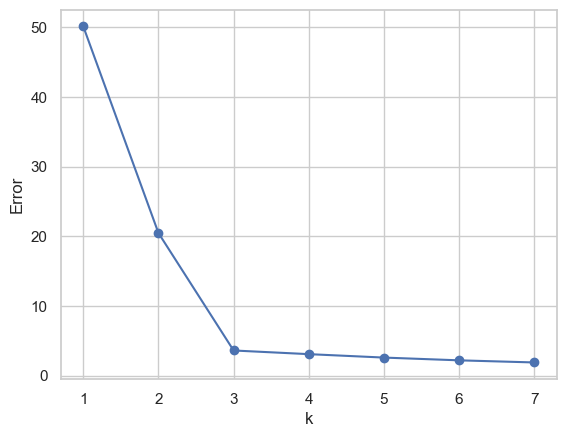

In [17]:
# errors = []
ks = range(1, 8)

# Schreibe deinen Code hier.

kmeans_k = [KMeans(n_clusters=k, random_state=33).fit(X) for k in ks]
errors = [model.inertia_ for model in kmeans_k]

# Schreibe deinen Code hier.

plt.plot(ks, errors,marker="o")
plt.xlabel("k")
plt.ylabel("Error")
plt.show()

## Aufgabe 5: Noise 

- Experimentiere mit dem Wert von `noise` in der ersten Zelle bei der Erzeugung der Daten. 
- Je größer der Wert ist, desto "verrauschter" sind die Daten. Was ändert sich dadurch für das `kmeans` Modell?

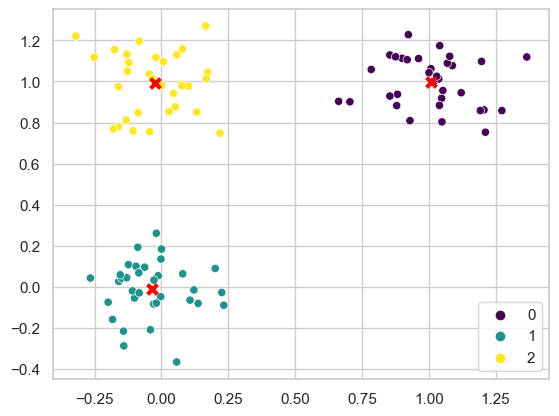

In [27]:
# Schreibe deinen Code hier.

def rauschen(noise):
    # Das Rauschen der Daten
    #noise = 0.13

    # Die Anzahl der Datenpunkte
    N = 100


    # Erzeugt N Datenpunkte mit je 2 Features und 3 "Blobs" 
    # Abhängig vom Rauschen sind die Daten mehr oder weniger um
    # die "centers" gestreut.
    X, y = make_blobs(n_samples = N,     
                      centers = [[0,0], [1,1], [0,1]],    
                      cluster_std = [noise, noise, noise], 
                      n_features = 2,
                      random_state = 33)

    # modell trainieren:
    kmeans = KMeans(n_clusters=3,random_state=33)
    kmeans.fit(X)

    # visualisieren:
    sns.scatterplot(x=X[:, 0], y=X[:, 1],hue=kmeans.labels_,palette="viridis")
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="x",c="red",s=50,linewidths=3)

rauschen(0.13)

# Schreibe deinen Code hier.

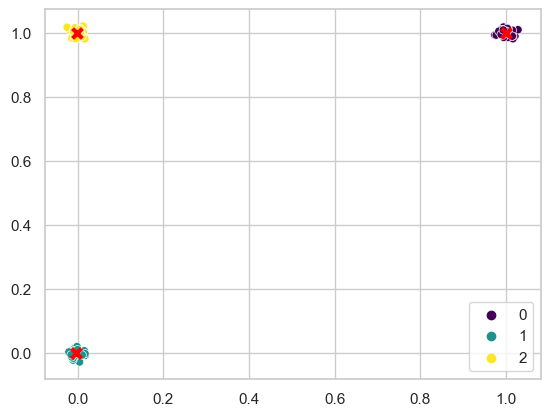

In [26]:
rauschen(0.01)

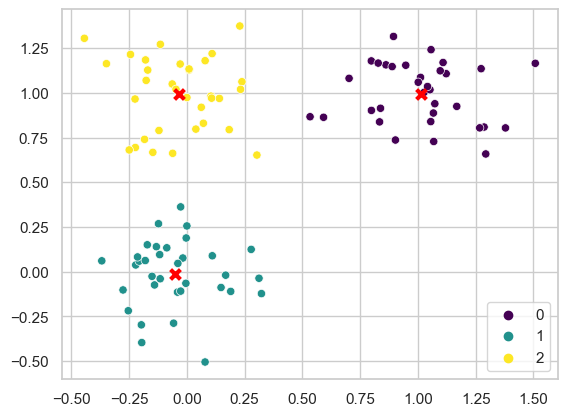

In [37]:
rauschen(0.18)

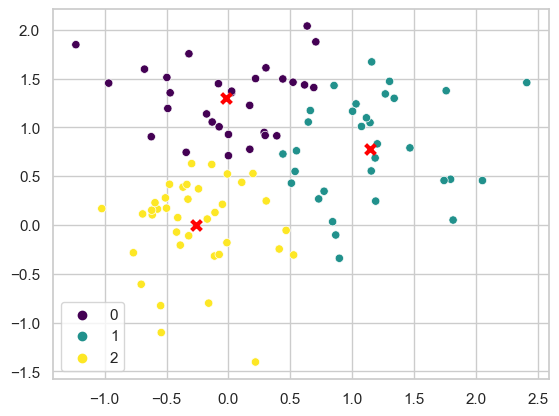

In [29]:
rauschen(0.50)

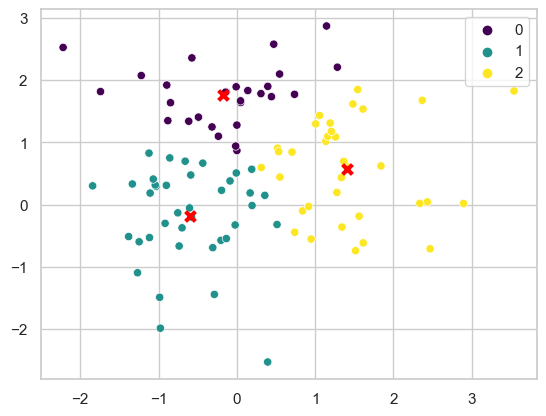

In [30]:
rauschen(0.90)